## Time Picking   
1. Automated using STA/LTA
2. Munual picking on individual traces

### Interactivity issues   

Google AI overview surprisingly gives some useful tips for trouble interacting  
with the plots.   

Troubleshooting Steps:   

1. Check Jupyter Extensions:   

Open a terminal and run: jupyter nbextension list to see installed extensions.   
If widgetsnbextension is not listed or marked as enabled, enable it:   
jupyter nbextension enable --py widgetsnbextension.   
Similarly, check and enable any other extensions related to the widgets you're using    
(e.g., jupyter-matplotlib for Matplotlib widgets).   

2. Verify Package Installations:   

Make sure ipywidgets and any other necessary packages are installed in the    
correct environment: pip install ipywidgets.   
If using conda, ensure the packages are installed in the    
active environment: conda install -c conda-forge ipywidgets.   
If you are using pipenv, ensure that you are installing the packages   
using pip from within the pipenv shell.   

3. Update or Downgrade Packages:   

Try updating ipywidgets: pip install --upgrade ipywidgets. 
If updating doesn't resolve the issue, try downgrading to a    
known stable version: pip install ipywidgets==7.7.2 (or another version). 

In [1]:
# this notebook may have problems with cursor graphics
# the python script version works well
# this is the graphics fix for jupyter??
# %matplotlib ipympl
# this is the graphics fix for vscode??
# %matplotlib widget
# use one of the above in interactive plot cells

from plotvsp.seisplots import wiggle_plot, scroll_plot
from iovsp.segyin import readsegyio3
import procvsp.spec as spec
import procvsp.utils as utilvsp
import timepick.pick_plot as pickplot
import timepick.pickers as tpick
from iovsp import text_io


### Load SEG-Y

In [2]:
#################### get the ZVSP SEGY filename ############################
        
#    filename = ('C:\\Users\\acampbell45\\Documents\\Python_Scripts'
#        '\\Synthetic_data\\data\\zvsp_z_fd_mod6_12p5ft_grid_delayed.sgy')

filename = ('data\\Devn1_raw_z.sgy')#zvsp_z_fd_mod6_12p5ft_grid_delayed.sgy')
    

###################### run basic segy loading functions #################### 
segyin_params={
'RepVel': 5000,             # replacement velocity
'SRD_ASL' : 0,              # Seismic Reference Datum SRD elevation above sea level
'DF_ASL' : 0,               # drill floor elevation ASL
'SrcElev' : -10,            # source elevation ASL
'file_head' : 'y',          # print binary and text header to screen    
'pr_thead' : 'n',           # print a table of trace headers
'ttbyte' : 197,             # starting byte for transit time
'ttscalar' : 100,           # divide transit time by a scalar
'file_headers' : 'n',       # print binary and text headers
'PTS' : 'y'}                # print table of trace headers      

data, numsamp, samprate, fs, vel_headers =  readsegyio3(filename,**segyin_params )
############ trim data and header arrays by receiver  
# problem starting at trace 402 - need to figure out
first_rcv =1
last_rcv = 100    
zvsp, zvsp_headers = utilvsp.depthlimit(data,vel_headers, first_rcv, last_rcv)


 data.shape : (415, 4000)
 table header file shape : (415, 15)
  Trc      Rcz      Rcz    Rcv X    Rcv Y    Src X    Src Y    Src Z      Obs      TVD     TVD     SrcZ    ILN    FFID    Src
  Num       MD      TVD                                                  Time      SRD     SrcZ     SRD
-----  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------  ------  -----  ------  -----
    1    814.5    814.5     -0.8      0.6   -333.0     19.0      0.0   145.00    814.5    804.5   -10.0      0    3901      0
    2    834.2    834.2     -0.7      0.6   -333.0     19.0      0.0   146.00    834.2    824.2   -10.0      0    3902      0
    3    853.9    853.9     -0.7      0.6   -333.0     19.0      0.0   148.00    853.9    843.9   -10.0      0    3903      0
    4    873.6    873.6     -0.6      0.6   -333.0     19.0      0.0   149.00    873.6    863.6   -10.0      0    3904      0
    5    893.3    893.3     -0.5      0.6   -333.0     19.0      0.0   150.00

### Spectrum of one trace


̲F̲r̲A̲n̲ ̲P̲a̲r̲a̲m̲e̲t̲e̲r̲s̲ ̲:
fs : 1000.0


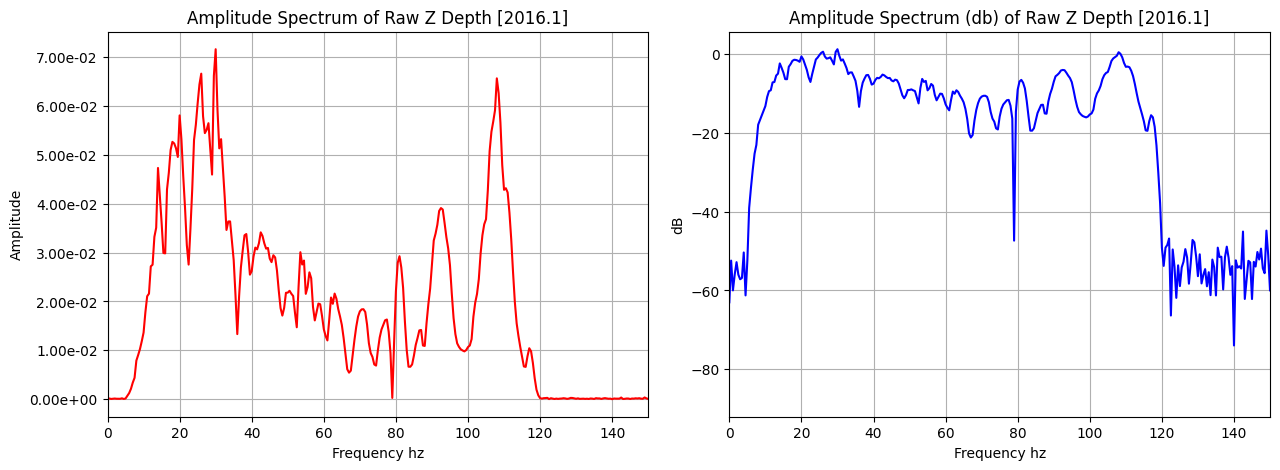

In [3]:
#########  FRequency ANalysis  
spec1d_params= {'trace' : 40,
'time_win' : 'y', # window trace prior to fft
'time_range' : [0, 2000],
'freq_range' : [0, 150],    
'title_fran' : 'Raw Z'  }  
spec.spec_1d(zvsp, zvsp_headers, fs, **spec1d_params)

### Bandpass filter


̲S̲c̲r̲o̲l̲l̲ ̲P̲l̲o̲t̲ ̲G̲l̲o̲b̲a̲l̲ ̲I̲n̲f̲o̲r̲m̲a̲t̲i̲o̲n̲ ̲:

plotdata.shape : (99, 4000)
 plotdata.dtype : float32
 headers.shape : (99, 15)
 first : 1  last : 415
 fs : 1000.0
 datascaled.shape : (98, 375)
 dscaler.shape : (98,)
 VSPtrim.shape : (98, 375)
 fs after decimation : 250
 norm : n  scal : 1000
 Max, Min Amplitude VSPdata : 0.060968526 -0.06494138
No figure exists.


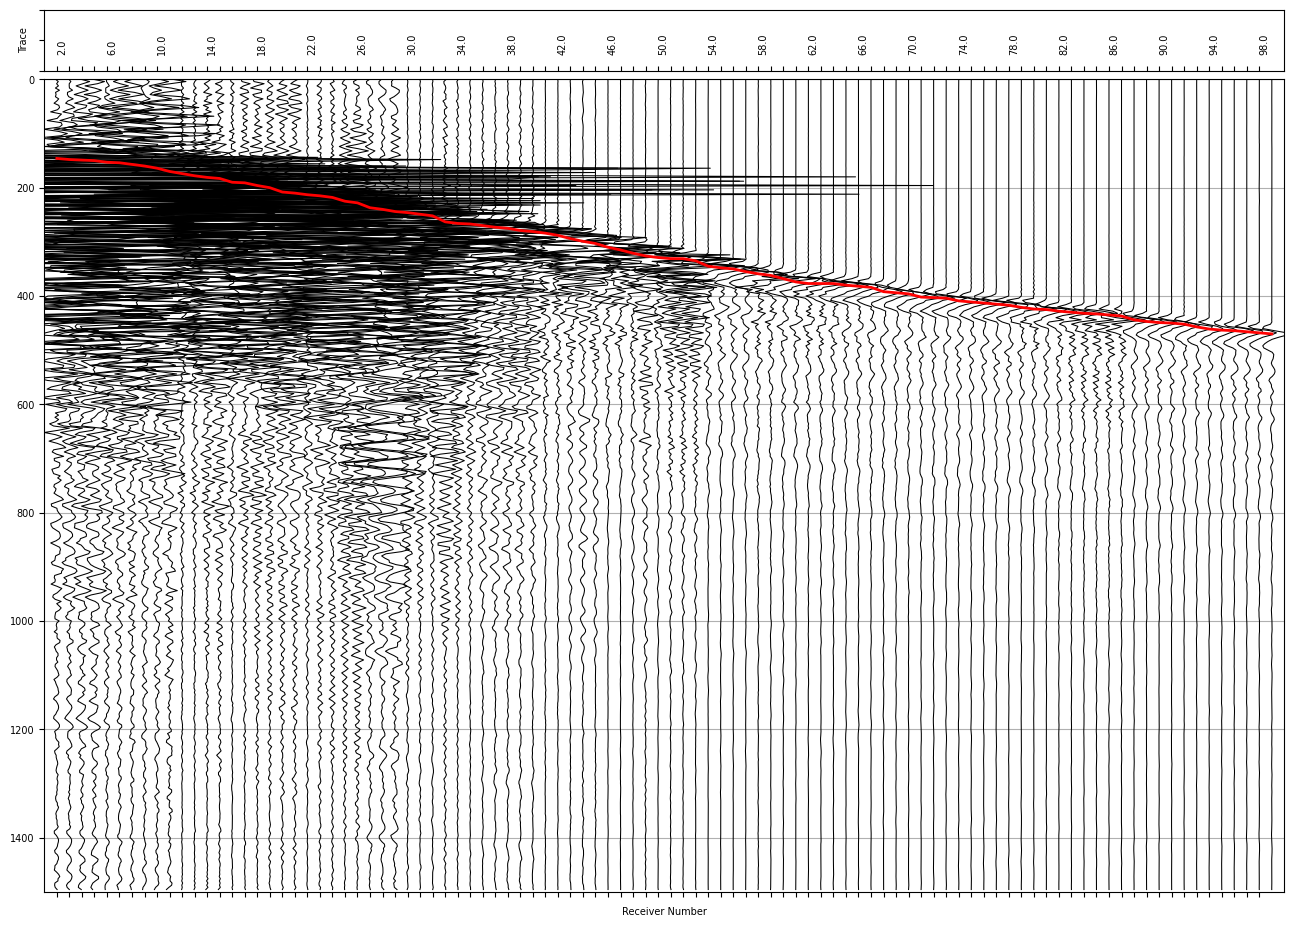

In [4]:

############ plot pre-BPF traces 
splot_params = {"pol":'n', 
        "etime":1500, "stime":0, 
            "first":1,
            "last":415, 
            "spacing":'r', 
            "skiplabel":4, 
            "norm":'n',
            "scal":1000,
            "dec":'y',  # decimate trace samples to speed plotting
            "tpi":10,
            "title_top":'Raw Z stack ',
            "va":'n'} 
scroll_plot(zvsp_headers,zvsp,fs, **splot_params)     

(99, 4000)

̲B̲P̲F̲ ̲Q̲C̲ ̲P̲l̲o̲t̲ ̲P̲a̲r̲a̲m̲e̲t̲e̲r̲s̲ ̲:
 N : 2048
 coeff.shape : (2048,)
 coeff.min() : -0.02395220394177316  coeff.max() : 0.08813500473075561
 t.min() : -1.024  t.max() : 1.0229999999997745
 x : [0. 0. 0. ... 0. 0. 0.]  center : 1024


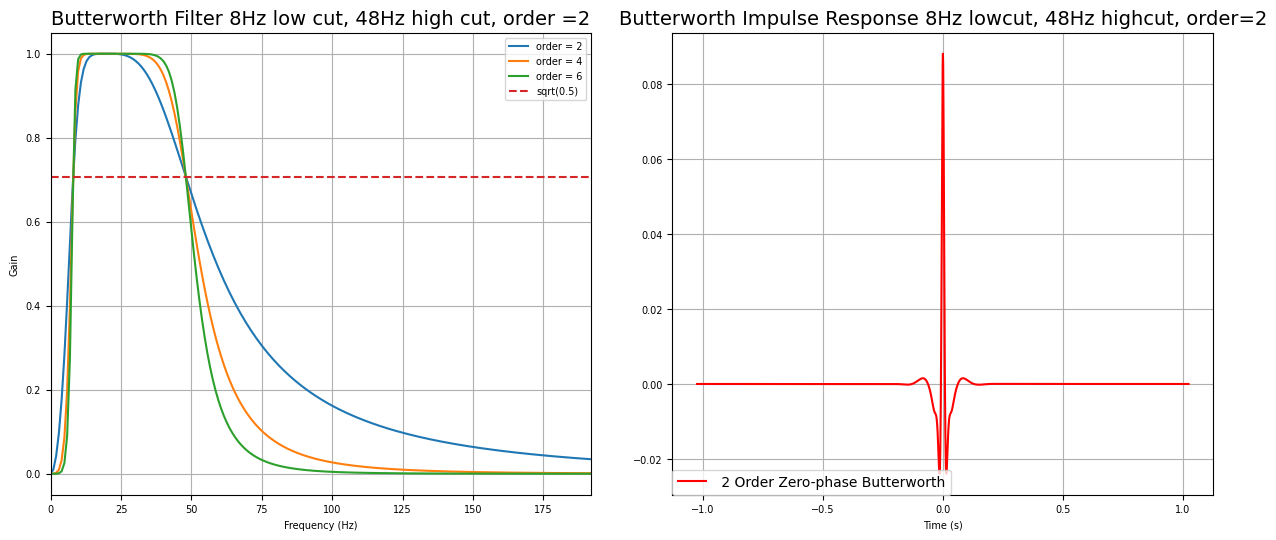


̲S̲c̲r̲o̲l̲l̲ ̲P̲l̲o̲t̲ ̲G̲l̲o̲b̲a̲l̲ ̲I̲n̲f̲o̲r̲m̲a̲t̲i̲o̲n̲ ̲:

plotdata.shape : (99, 4000)
 plotdata.dtype : float32
 headers.shape : (99, 15)
 first : 1  last : 415
 fs : 1000.0
 datascaled.shape : (98, 375)
 dscaler.shape : (98,)
 VSPtrim.shape : (98, 375)
 fs after decimation : 250
 norm : n  scal : 1000
 Max, Min Amplitude VSPdata : 0.015851798 -0.018103642
No figure exists.


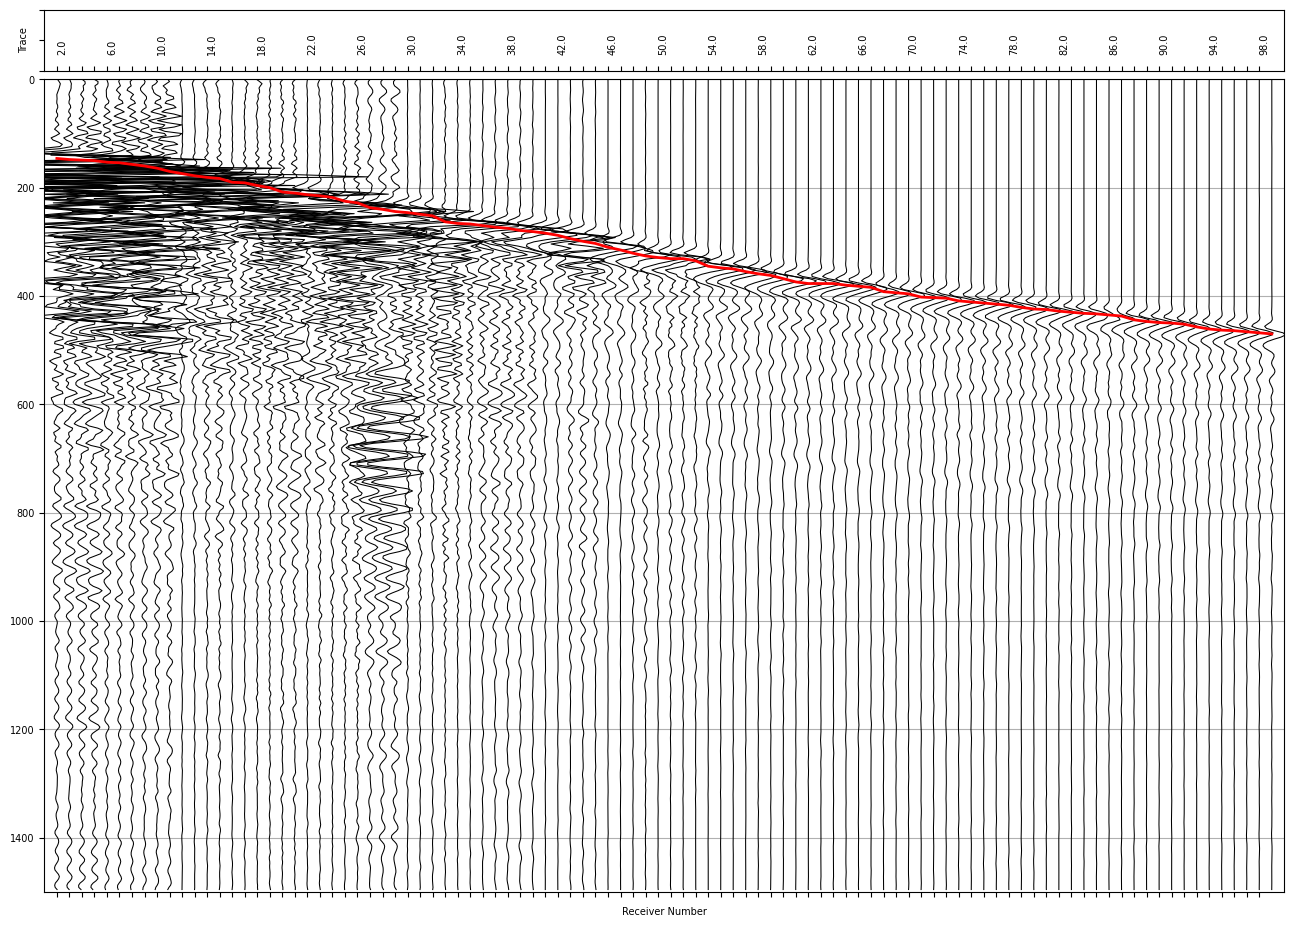

In [5]:
################### Apply a band-pass filter 
# Uses a Butterworth filter    
# Sample rate and desired cutoff frequencies (in Hz).
bpf_params={'lowcut' :8,
'highcut' :48,    
'qcplot' : 'n',
'order'  : 2,     # order gets doubled by implementation of filter, be careful    
'numfsamp' : 2048}     
stack_bpf,sos_out = spec.bandpass_filter(zvsp,  fs,  **bpf_params)
print (stack_bpf.shape)
spec.BPF_QCplot(sos_out,fs,**bpf_params)

############ plot post-BPF traces 
splot_params = {"pol":'n', 
        "etime":1500, "stime":0, 
            "first":1,
            "last":415, 
            "spacing":'r', 
            "skiplabel":4, 
            "norm":'n',
            "scal":1000,
            "dec":'y',  # decimate trace samples to speed plotting
            "tpi":10,
            "title_top":'Raw Z stack ',
            "va":'n'} 
scroll_plot(zvsp_headers,stack_bpf,fs, **splot_params)     

### Run STA-LTA on all traces with tuning on peak

Background:   

The triggering algorithm applied to the bandpass filtered data is a standard STA/LTA ratio test.   
Averages of the modulus of signal amplitude are computed over two user defined time periods,   
a short time average (STA) and a long time average (LTA), and the ratio of the two at each sample point is computed (STA/LTA).  

Traditionally, if this ratio exceeds a user-defined threshold, then a trigger is declared, and the system remains in a   
triggered state until the ratio falls below the defined threshold. The trigger works by identifying sections of   
an incoming data stream when the signal amplitude increases.  
  
The short term average reduces the probability of triggering on spurious spikes or short duration transients,   
introduces some element of frequency selectivity into the triggering process. As a rule of thumb,   
the short term average should be set to the dominant frequency of the events the trigger is designed to catch.   
The the long term average provides a measure of the variation in the background seismic noise, so it should be   
set to some value longer than the period of the lowest frequency seismic signal of interest.   

Here, the first maximum of the STA/LTA ratio is the initial pick. A window surrounding the STA-LTA pick is defined   
on the data trace and the pick is then tuned to nearest maximum for zero-phase (vibroseis) data.   


See https://www.guralp.com/documents/html/MAN-D16-0001/s4.html   

Some qc plots on a single trace. 

1. the VSP or seismic trace
2. input to __STA/LTA__ 
    - the input seismic squared - input to __STA/LTA__ calculations  
    - optionally the Hilbert envelope of the seismic trace 
3. STA and LTA curves
4. __STA\LTA__ ratio on which the pick is made by finding the index of the maximimum amplitude  
    - also known as cft or characteristic function  
    - initial picks are made on the first maximum of cft   
    - the inital pick is tuned to the nearest peak of the input seismic trace   
   
<img src="timepick/STA_LTA_trace_1.png" width="800" height="350" align="left" />  
<br clear="left"/>   
<br>
<br>  

5. the gradient of the cft - may use to detect zero-crossings, inflection points etc.  
6. the gradient of the gradient (2nd derivative)  
7. the gradient of the seismic - minimum gradient (slope) is consistent with   
   inflection point tangent used in SLB picking

 Markup : 1. A numbered list
              1. A nested numbered list
              2. Which is numbered
          2. Which is numbered

In [6]:
# use 'ipympl' interactive graphic cells in jupyter lab??
# %matplotlib ipympl
# use 'widget' for interactive graphic cells in vscode

platform = utilvsp.platform_chk()

print (platform)
if (platform =="in VS Code")or(platform =="in VSCODE"):
    %matplotlib widget
else:
    %matplotlib ipympl

Program working in Jupyter within VS Code
in VS Code



̲S̲c̲r̲o̲l̲l̲ ̲P̲l̲o̲t̲ ̲G̲l̲o̲b̲a̲l̲ ̲I̲n̲f̲o̲r̲m̲a̲t̲i̲o̲n̲ ̲:

plotdata.shape : (99, 4000)
 plotdata.dtype : float32
 headers.shape : (99, 17)
 first : 1  last : 415
 fs : 1000.0
pick_flag :  y TT_16.shape : (98,)
 datascaled.shape : (98, 375)
 dscaler.shape : (98,)
 VSPtrim.shape : (98, 375)
 fs after decimation : 250
 norm : n  scal : 1000
 Max, Min Amplitude VSPdata : 0.015851798 -0.018103642
No figure exists.


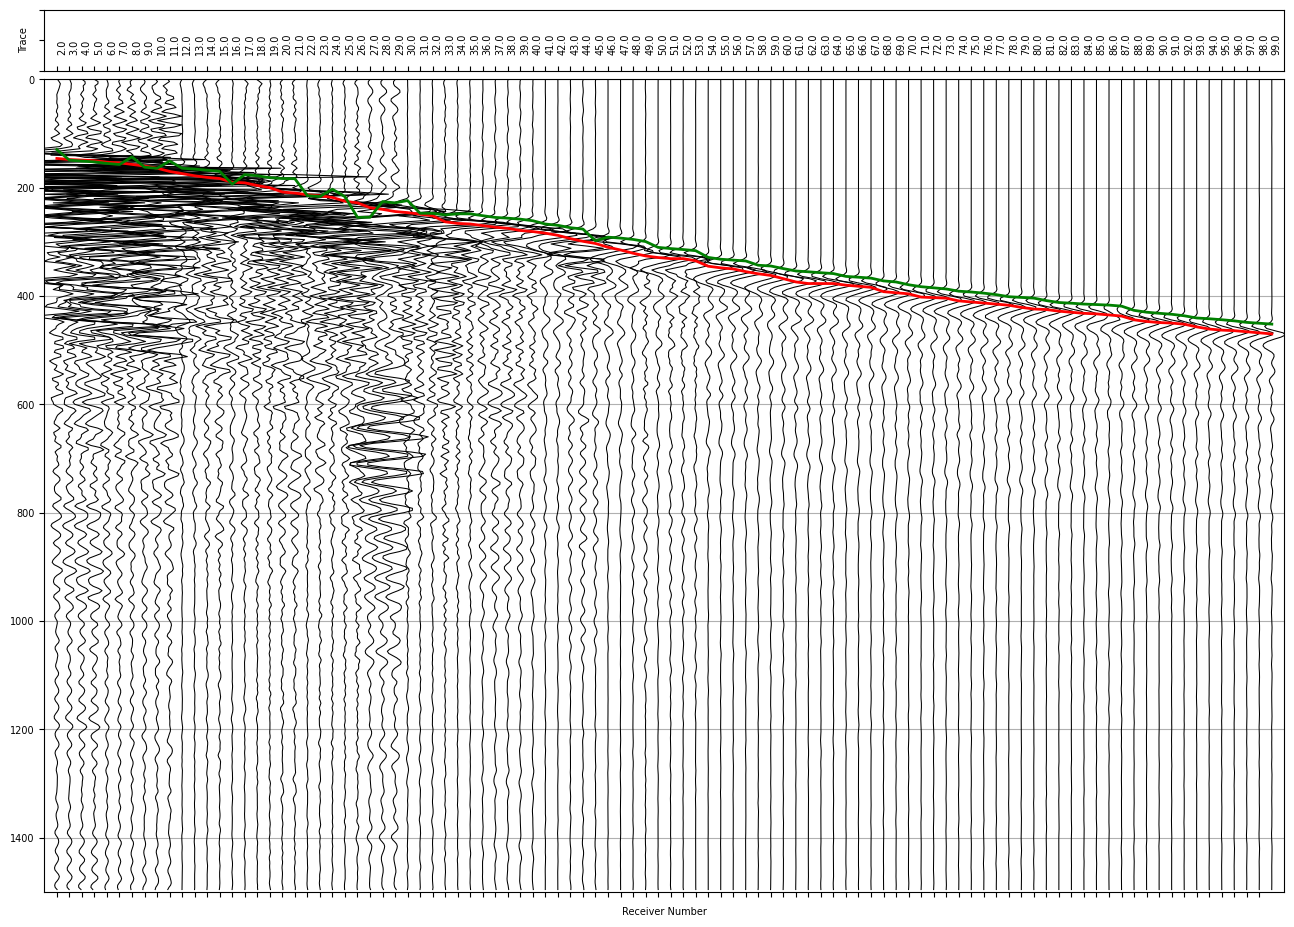

In [7]:
############# run recursive STA-LTA on all data #####################
pick_params = dict(
    test_trace = 385,
        shortwin = 25,
        longwin = 125,
        envelope = 'n', # use hilbert envelope instead of trace amplitude
        qcplots = 'y',
        stime_plot = 0, # time window for calculations and plots
        etime_plot = 1500,         
        subsamp_ratio = 10, # increase is slower but get  fractional ms
        stabilization = .1, # smaller if first break is relatively weak
        tune =60,
        verbose='n',
        table = 'n',
        picktype = 'ipt')# pk for peak, ipt for inflection point tangent, zc for zero-crossing
    
picks_headers = tpick.pick_vsp(stack_bpf,zvsp_headers,fs,**pick_params)

############ first plot of wiggles and velocities 
splot_params = {"pol":'n', 
        "etime":1500, "stime":0, 
            "first":1,
            "last":415, 
            "spacing":'r', 
            "skiplabel":1, 
            "norm":'n',
            "scal":1000,
            "dec":'y',  # decimate trace samples to speed plotting
            "tpi":10,
            "title_top":'Raw Z stack ',
            "va":'n'} 
scroll_plot(picks_headers,stack_bpf,fs, **splot_params)     

### Interactive picking set-up for Jupyter or VS Code 

Make sure the matplotlib widget is enabled in your virtual environment

### Interactive picking on all traces   

Single click of mouse to make new pick.   

After making pick, re-run table generating cell


̲P̲i̲c̲k̲e̲r̲_̲M̲u̲l̲t̲i̲ ̲t̲r̲a̲c̲e̲ ̲G̲l̲o̲b̲a̲l̲ ̲I̲n̲f̲o̲r̲m̲a̲t̲i̲o̲n̲ ̲:
 Input data shape : (99, 4000) fs : 1000.0
 tkinter used? : n
 fs : 1000.0 ssamp : 0  esamp : 1000
Number of traces in plot : 49  Number of samples per trace : 1000
 thead shape : (99, 17)
 fs : 1000.0  fs_resamp : 10000.0
 fs resampled : 10000.0
 time min , time max: 0.0 999.9000000000001
 data1 shape resampled : (49, 10000)
 datascaled shape [0] 49  datascaled shape [1] 10000
 dscaler.shape : (49,)  ttime.shape : (49,)
 dscaler : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
 dscaler[0]-pad : 0  dscaler[-1]+pad : 50.0
 np.min(trnum)-pad : 0  np.max(trnum)+pad : 50.0


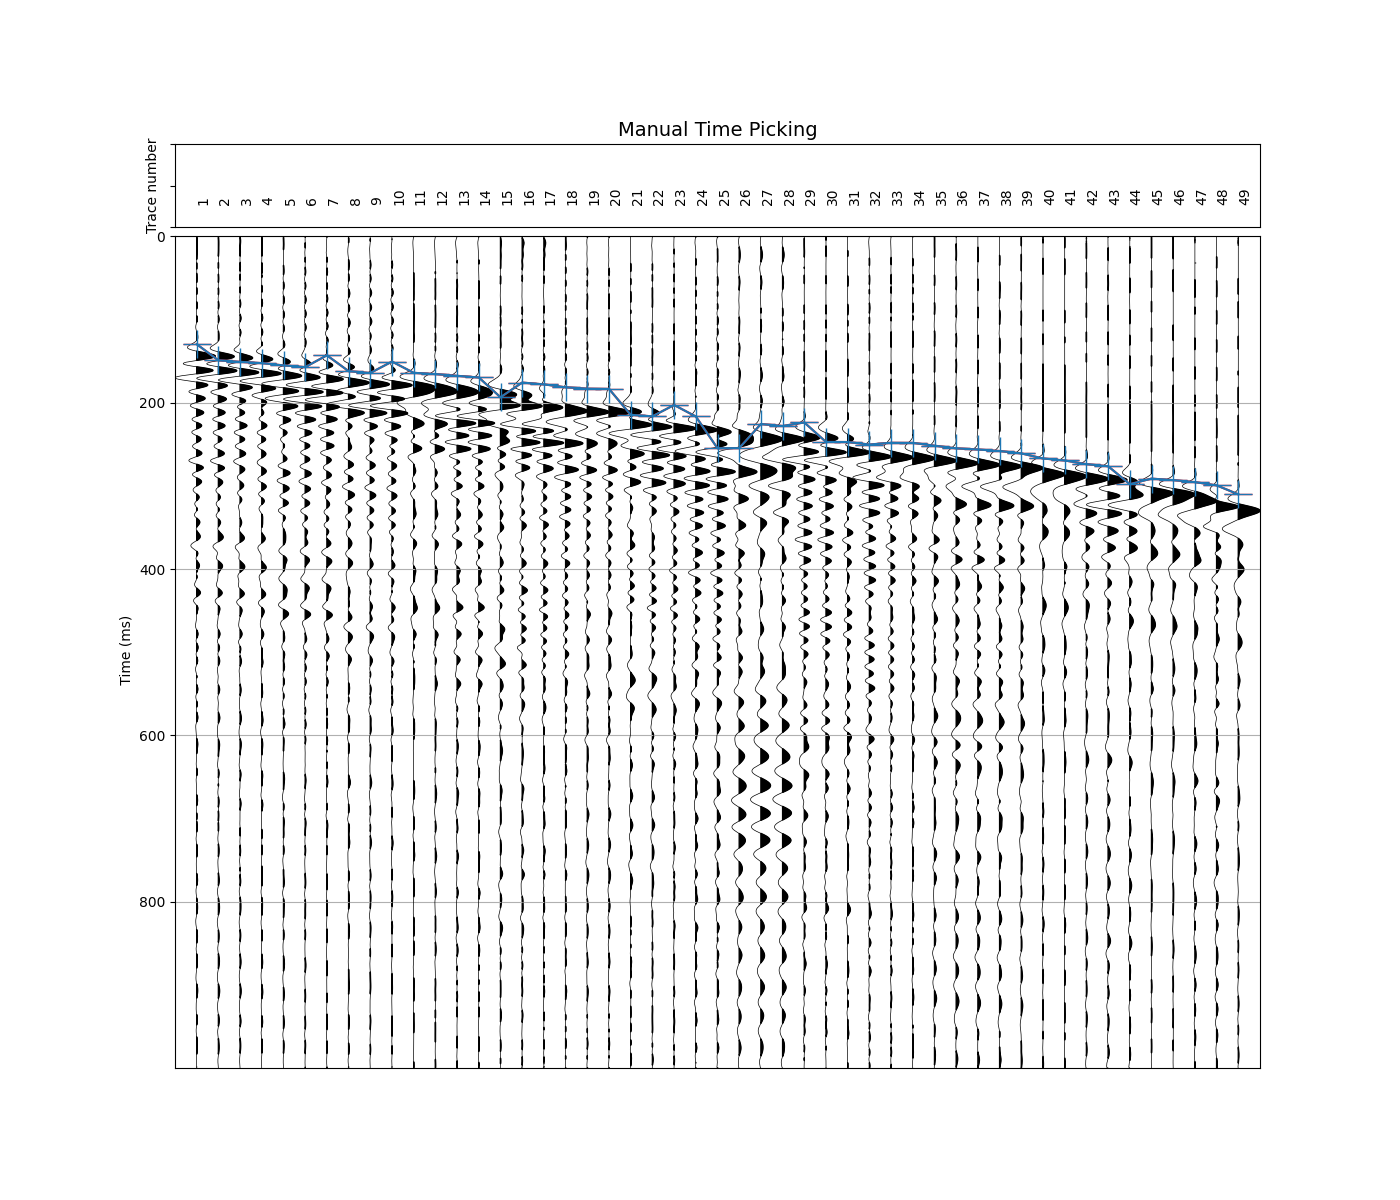

In [8]:
################ develop interactive picking #########################

Title_plot = ' VSP Interactive Time Pick '

picker_params = dict(Scalar=1,time_range = [0, 1000],trace_range=[1,50],polarity='n', 
                    tr_spacing='r', header_spacing = 1, plot_norm='y', var_area='y', 
                    tr_per_in=10,in_per_s=.1,subsamp_ratio = 10, tkinter_use='n')
picks=pickplot.picker_multitrace(stack_bpf, picks_headers, fs, **picker_params )


### Generate table of updated headers   
-Re-run after interaction with above plot

In [9]:
# re-run after interaction with plot
# qc print of  headers

table =text_io.header_table(picks,numcols=16)

  Trc     Rcz     Rcz    Rcv X    Rcv Y    Src X    Src Y    Src Z     Obs     TVD    TVD     SrcZ    ILN    FFID    Src    STA-LTA    Tuned TT
  Num      MD     TVD                                                 Time     SRD    SrcZ     SRD
-----  ------  ------  -------  -------  -------  -------  -------  ------  ------  ------  ------  -----  ------  -----  ---------  ----------
    1   814.5   814.5     -0.8      0.6   -333.0     19.0      0.0  145.00   814.5   804.5   -10.0      0    3901      0     145.70      128.30
    2   834.2   834.2     -0.7      0.6   -333.0     19.0      0.0  146.00   834.2   824.2   -10.0      0    3902      0     146.50      129.70
    3   853.9   853.9     -0.7      0.6   -333.0     19.0      0.0  148.00   853.9   843.9   -10.0      0    3903      0     147.00      149.10
    4   873.6   873.6     -0.6      0.6   -333.0     19.0      0.0  149.00   873.6   863.6   -10.0      0    3904      0     174.70      150.90
    5   893.3   893.3     -0.5      0

### Write SEG-Y

In [10]:
###########  output segy 
from iovsp.segyout import write_segyio

# either edit the dictionary below, or import the dictionary
text_header_in = {
    1: 'ZVSP', 
    2: 'Time Pick and SEG-Y read-write tests in jupyter',
    3: 'VSProwess',
    4: ' ',
    5: 'WELL: Allan 1',
    6: ' ',
    7: 'Processed by VSP Consultants',
    8: ' ' ,
    9: 'Reference Elevation:  ft',
    10: ' ',
    11: 'Geophone component: 025-028 Z=1, X=2, Y=3' ,
    12: 'Source Easting:  073-076     Source Elev: 045-048' ,
    13: 'Source Northing: 077-080' ,
    14: 'Receiver Easting: 081-084    Measured Depth: 037-040' ,
    15: 'Receiver Northing: 085-088   Vertical Depth: 041-044' ,
    16: '  ',
    17: 'Uncorrected Pick Time: 107-108' ,
    18: 'TWO-Way Time : 109-110' ,
    19: ' ',
    20: ' ',
    21: 'Units  = Survey Feet' ,
    22: 'Wellhead Easting (ft): 0' ,
    23: 'Wellhead Northing (ft): 0' ,
    24: ' ',
    25: ' ****Processing Steps: ***********' ,
    26: 'Original file from VSProwess' ,
    27: 'Read and write with segyio',
    28: ' ' ,
    29: ' ',
    30: ' ', 
    31: ' ',
    32: ' ',
    33: ' ',
    34: ' ',
    35: ' ',
    36: ' ',
    37: ' ',
    38: 'VSProwess processing system'  
    }
# either edit the dictionary above, or import the dictionary (below)
from iovsp.text_header import text_header

# output segy file name and chose the dictionary (imported or inline above)
segout_params={
    'timbit' : 107,
    'timscal' : 100,
    'sxbit' : 77,
    'sybit' : 73,
    'szbit' : 49,
    'rxbit' : 81,
    'rybit' : 85,
    'rzbit' : 37}
outfilename = ('data\\tpicked.sgy')
# use the imported dictionary
write_segyio(stack_bpf, text_header, picks_headers, fs, outfilename,**segout_params)
# use the in-line dictionary from above    
# write_segyio(stack_bpf, text_header_in, picks_headers, fs, outfilename,**segout_params)    



̲W̲r̲i̲t̲e̲ ̲S̲e̲g̲y̲i̲o̲ ̲S̲t̲a̲t̲s̲ ̲:
Data shape [0] : 99 Data shape [1] : 4000
Trace header shape (99, 17)
time header : [[ 1.00000000e+00  8.14500000e+02  8.14500000e+02 -8.00000000e-01
   6.00000000e-01 -3.33000000e+02  1.90000000e+01  0.00000000e+00
   1.45000000e+02  8.14500000e+02  8.04500000e+02 -1.00000000e+01
   0.00000000e+00  3.90100000e+03  0.00000000e+00  1.45699997e+02
   1.28300003e+02]
 [ 2.00000000e+00  8.34200000e+02  8.34200000e+02 -7.00000000e-01
   6.00000000e-01 -3.33000000e+02  1.90000000e+01  0.00000000e+00
   1.46000000e+02  8.34200000e+02  8.24200000e+02 -1.00000000e+01
   0.00000000e+00  3.90200000e+03  0.00000000e+00  1.46500000e+02
   1.29699997e+02]]
MD shape : (99,)  MD dtype : int32
 MD [1:10] : [ 8145  8342  8539  8736  8933  9524  9721 10115 10509 10706]  TVD[0:10] : [ 8145  8342  8539  8736  8933  9524  9721 10115 10509 10706]
 spec.tracecount : 99


### Write headers to ascii

In [11]:
# write formatted header table to ascii
outfilehedr = 'data\\timdepth.txt'
text_io.export_ascii(outfilehedr, table)